
Convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in image recognition and processing. When discussing CNNs, several key terms and concepts come into play:

    Convolutional Layer: This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
        Convolutional Operation: This operation involves a kernel (or filter) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently focused on. The result is a single value in the output feature map.



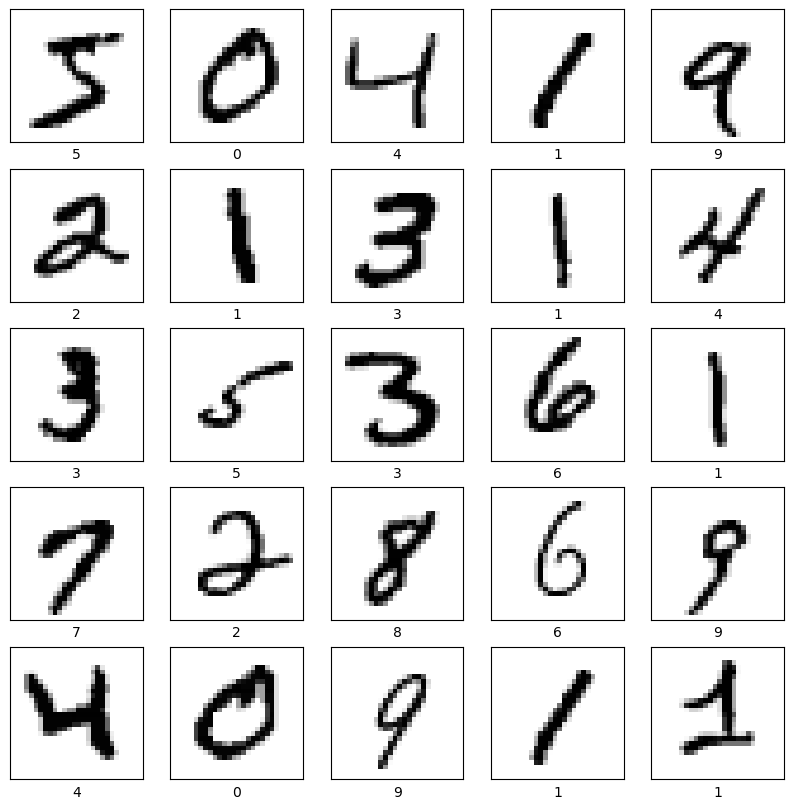

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [14]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

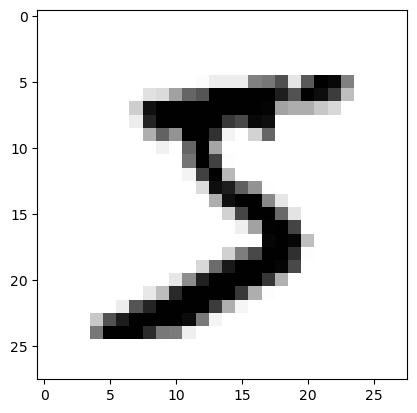

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

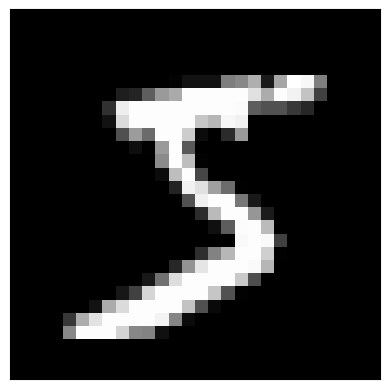

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [18]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [19]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

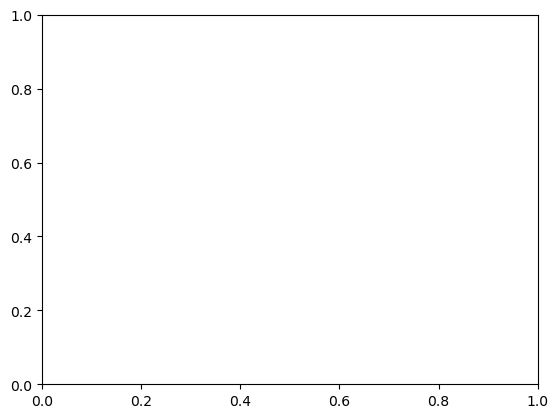

In [20]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

Build the model

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 10)        910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 10)          910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)              

In [23]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
#train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


ValueError: in user code:

    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [64, 28, 28]


In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

ValueError: in user code:

    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    c:\Users\Owner\anaconda3\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 28, 28]



Pixel values of the first image after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.118 0.141 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.192 0.933 0.992 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.071 0.859 0.992 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.314 0.612 


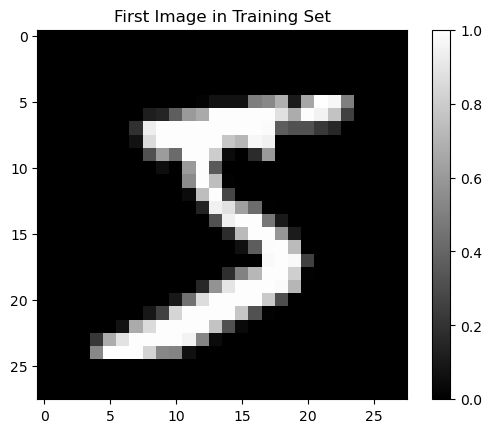

Epoch 1/5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Display pixel values of the first image
print("\nPixel values of the first image after normalization:")
for row in X_train[0][:10]:  # Display only the first 10 rows
    for pixel in row[:10]:  # Display only the first 10 pixels in each row
        print("{:0.3f}".format(pixel), end=" ")
    print()

# Reshape the images to include the channel dimension (28x28x1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Display the first image in the dataset
plt.imshow(X_train[0].squeeze(), cmap="gray")  # Grayscale image
plt.title("First Image in Training Set")
plt.colorbar()
plt.show()

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv layer
    Flatten(),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
